# EE 386 Digital Signal Processing Lab
## Experiment 4

In [3]:
# Importing necessary libraries and modules
import numpy as np
import IPython
import scipy
import math
import matplotlib

import pandas as pd
from scipy import signal as sp
from scipy.io import wavfile

from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams

In [4]:
%matplotlib inline
plt.style.use(['seaborn-deep'])
plt.rcParams.update({
    "font.serif": ["cm"],
    "mathtext.fontset": "cm",
    "figure.figsize": (12,6),
    "font.size": 10})

pi = np.pi

In [5]:
#Roll number: 191EE238
alpha = 1 + 238 % 3  
print(alpha)

2


#### Problem 1

In [6]:
# Question 1

t = np.arange(0,2,1/120)
y = np.sin(2*pi*30*t)        #15 * alpha = 30 Hz ==> Nyquist rate = 60 Hz

Number of samples:  240


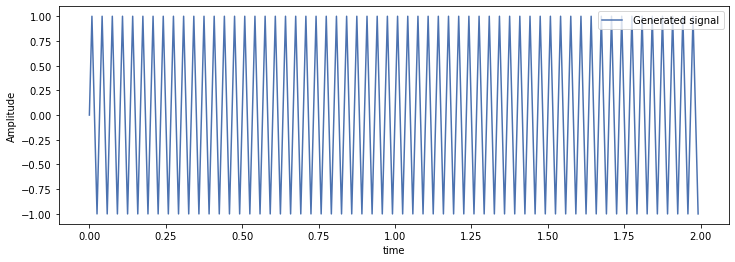

In [7]:
plt.figure(figsize = (12,4))
plt.plot(t,y, label = " Generated signal" )
plt.xlabel("time")
plt.ylabel('Amplitude')
plt.legend(loc = 'upper right')
plt.savefig("Experiment-4/Results/Generated_signal.png")

print("Number of samples: ",len(y))

In [8]:
def plot_mag(x, Fs,samples=None,Label = None,clr = None,norm = False):
    
    if samples == None:
        C = int(len(x) / 2)
    else:
        C = samples
        
    X = np.abs(np.fft.fft(x[0:C]))
    N = Fs * np.arange(0, C) / len(X);
    
    X_norm = X
    if norm:
        X_norm = (1/C) * X;
    
    if clr == None:
        plt.stem(N, X_norm,label = Label)
    else:
        plt.stem(N, X_norm,clr,label = Label)
    
    if Label:
        plt.legend(loc = 'upper right')
    
    return N, X_norm

Number of samples: 120


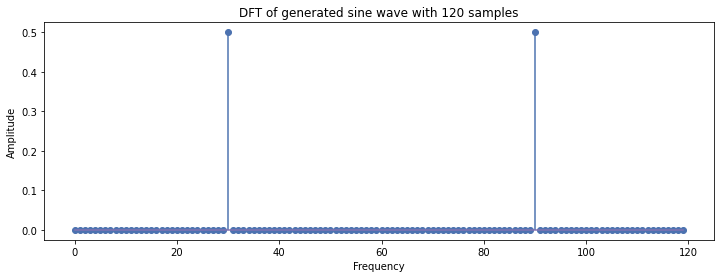

In [9]:
plt.figure(figsize = (12,4))
plt.title("DFT of generated sine wave with 120 samples")
N, _= plot_mag(y, Fs = 120,samples= 120,norm = True)

plt.ylabel("Amplitude")
plt.xlabel("Frequency")
print("Number of samples:",len(N))
plt.savefig("Experiment-4\Results\DFT of signal.png")

Number of samples: 120
Number of samples: 130


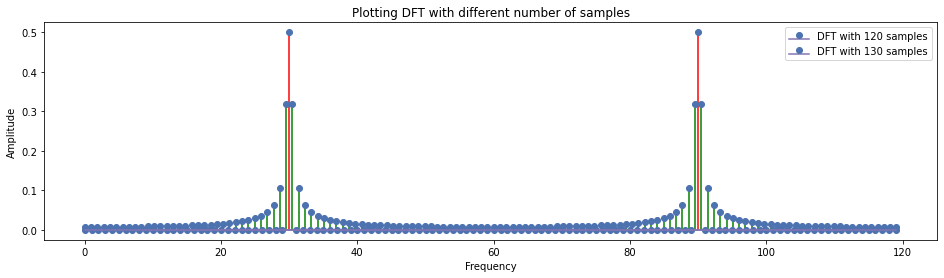

In [10]:
plt.figure(figsize = (16,4))
plt.title("Plotting DFT with different number of samples")
N, _= plot_mag(y, Fs = 120, samples = 120,norm = True,clr = 'r', Label = "DFT with 120 samples")
plt.ylabel("Amplitude")
plt.xlabel("Frequency")
print("Number of samples:",len(N))

#Question 2
N, _= plot_mag(y, Fs = 120,samples = 130,norm = True,clr = 'g', Label = "DFT with 130 samples")
plt.ylabel("Amplitude")
plt.xlabel("Frequency")
plt.savefig("Experiment-4/Results/DFT_window.png")
print("Number of samples:",len(N))

Number of samples: 4


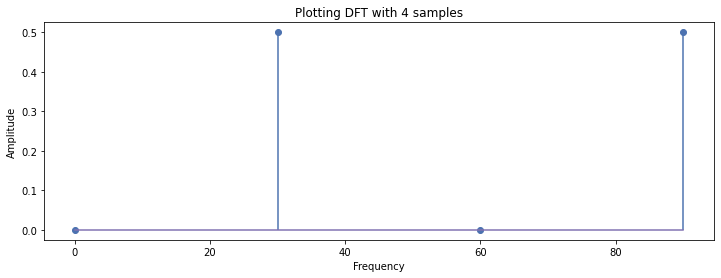

In [11]:
#Question 3
plt.figure(figsize = (12,4))
plt.title("Plotting DFT with 4 samples")
N, _= plot_mag(y, Fs = 120, samples = 4 ,norm = True)
plt.ylabel("Amplitude")
plt.xlabel("Frequency")
print("Number of samples:",len(N))

plt.savefig("Experiment-4/Results/4 sample DFT")

By using formula $\frac{k}{N} = \frac{F}{Fs}$, for F = 30, Fs = 120,$\newline$
N = 4k, which implies that if samples that are multiples of 4 are taken then there will be no spectral leakage.

#### Problem 2

In [12]:
A = 140
B = 146
Fs = 200
t = np.arange(0,10,1/Fs)
x = 0.1 * np.sin(A * pi * t) + np.cos(B * pi * t)

In [13]:
print("Total number of Samples:",Fs*10)

Total number of Samples: 2000


In [14]:
def plot_dft(x, Fs,samples=None,Label = None,norm = False,interpolate = True):
    
    X = np.abs(np.fft.fft(x[0:samples]))
    N = Fs * np.arange(0, samples) / len(X);
    
    X_norm = X
    if norm:
        X_norm = (1/samples) * X;
    
    if interpolate == True:
        plt.plot(N, X_norm,label = Label)
    else:
        plt.stem(N, X_norm,label = Label)
    
    if Label:
        plt.legend(loc = 'upper right')
    
    return N, X_norm

Number of samples in fig 1: 215
Number of samples in fig 2: 415
Number of samples in fig 3: 1115
Number of samples in fig 4: 1515
Number of samples in fig 5: 1915


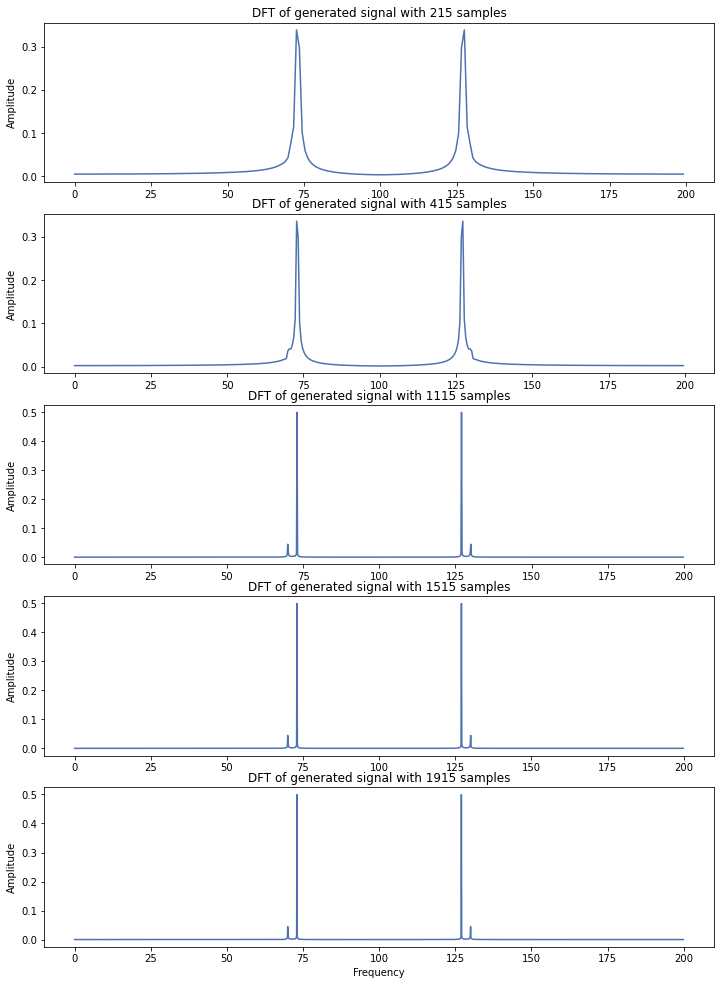

In [29]:
plt.figure(figsize = (12,17))
#215 samples
plt.subplot(5,1,1)
plt.title("DFT of generated signal with 215 samples")
N,_ = plot_dft(x, Fs = 200,samples = 215,norm = True)
plt.ylabel("Amplitude")
print("Number of samples in fig 1:", len(N))

#415 samples
plt.subplot(5,1,2)
plt.title("DFT of generated signal with 415 samples")
N,_ = plot_dft(x, Fs = 200,samples = 415,norm = True)
plt.ylabel("Amplitude")
print("Number of samples in fig 2:", len(N))

#1115 samples
plt.subplot(5,1,3)
plt.title("DFT of generated signal with 1115 samples")
N,_ = plot_dft(x, Fs = 200,samples = 1115,norm = True)
plt.ylabel("Amplitude")
print("Number of samples in fig 3:", len(N))

#1515 samples
plt.subplot(5,1,4)
plt.title("DFT of generated signal with 1515 samples")
N,_ = plot_dft(x, Fs = 200,samples = 1515,norm = True)
plt.ylabel("Amplitude")
print("Number of samples in fig 4:", len(N))

#1915 samples
plt.subplot(5,1,5)
plt.title("DFT of generated signal with 1915 samples")
N,_ = plot_dft(x, Fs = 200,samples = 1915,norm = True)
plt.ylabel("Amplitude")
plt.xlabel("Frequency")
print("Number of samples in fig 5:", len(N))

plt.savefig("Experiment-4/Results/DFT with diff samples")

#### Problem 3

Text(0, 0.5, 'Amplitude')

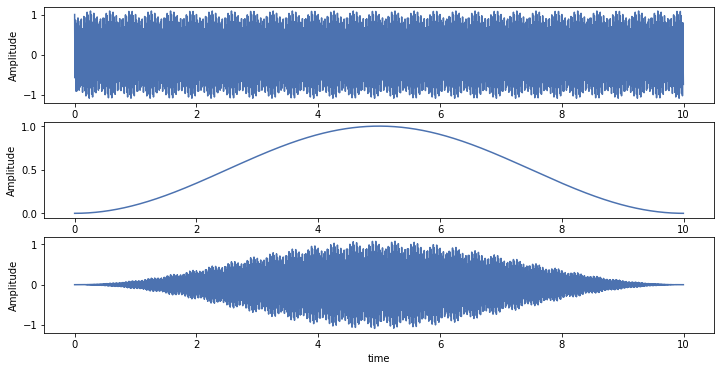

In [16]:
t = np.arange(0,10,1/200)
han = 0.5- 0.5 * np.cos( 2*pi*1/10*t )

Y = np.multiply(x,han)
plt.subplot(3,1,1)
plt.plot(t,x)
plt.ylabel('Amplitude')
plt.subplot(3,1,2)
plt.plot(t,han)
plt.ylabel('Amplitude')
plt.subplot(3,1,3)
plt.plot(t,Y)
plt.xlabel('time')
plt.ylabel('Amplitude')

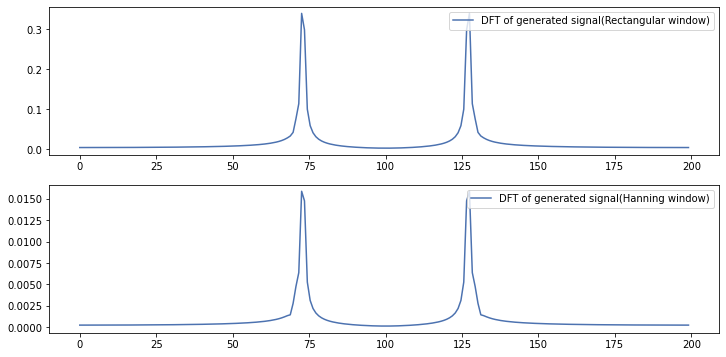

In [17]:
plt.figure(figsize = (12,6))
plt.subplot(2,1,1)
_,_ = plot_dft(x, Fs = 200, samples = 215,norm = True,Label = "DFT of generated signal(Rectangular window)")
plt.subplot(2,1,2)
_,_ = plot_dft(Y, Fs = 200, samples = 215,norm = True,Label = "DFT of generated signal(Hanning window)")

Number of samples in fig 1: 215
Number of samples in fig 2: 415
Number of samples in fig 3: 1115
Number of samples in fig 4: 1515
Number of samples in fig 5: 1915


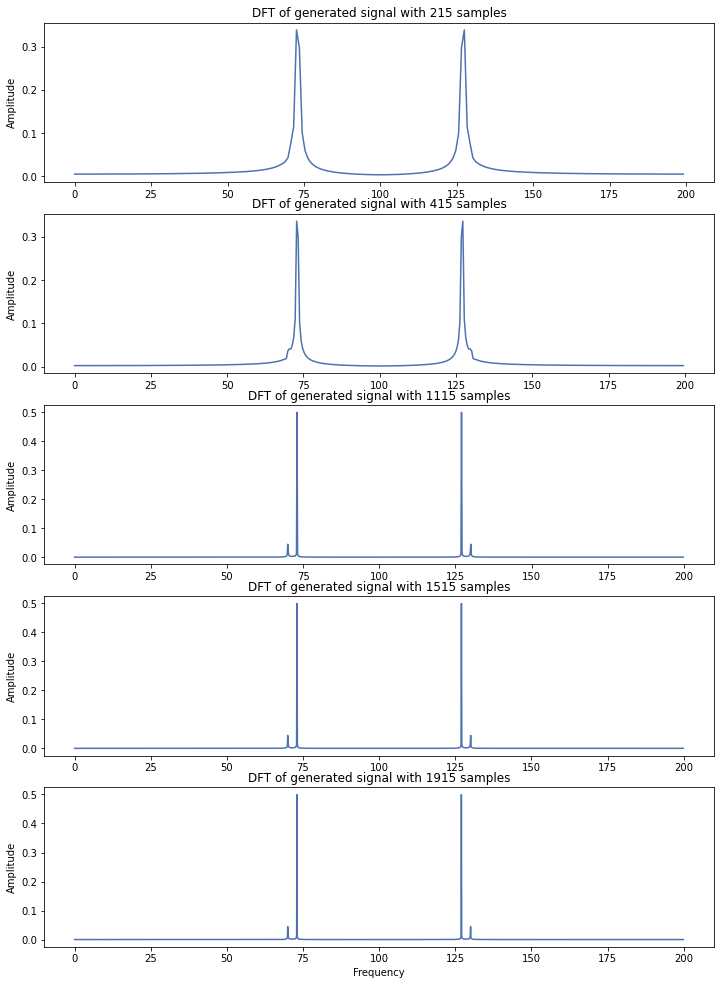

In [30]:
plt.figure(figsize = (12,17))
#215 samples
plt.subplot(5,1,1)
plt.title("DFT of generated signal with 215 samples")
N,_ = plot_dft(x, Fs = 200,samples = 215,norm = True)
plt.ylabel("Amplitude")
print("Number of samples in fig 1:", len(N))

#415 samples
plt.subplot(5,1,2)
plt.title("DFT of generated signal with 415 samples")
N,_ = plot_dft(x, Fs = 200,samples = 415,norm = True)
plt.ylabel("Amplitude")
print("Number of samples in fig 2:", len(N))

#1115 samples
plt.subplot(5,1,3)
plt.title("DFT of generated signal with 1115 samples")
N,_ = plot_dft(x, Fs = 200,samples = 1115,norm = True)
plt.ylabel("Amplitude")
print("Number of samples in fig 3:", len(N))

#1515 samples
plt.subplot(5,1,4)
plt.title("DFT of generated signal with 1515 samples")
N,_ = plot_dft(x, Fs = 200,samples = 1515,norm = True)
plt.ylabel("Amplitude")
print("Number of samples in fig 4:", len(N))

#1915 samples
plt.subplot(5,1,5)
plt.title("DFT of generated signal with 1915 samples")
N,_ = plot_dft(x, Fs = 200,samples = 1915,norm = True)
plt.ylabel("Amplitude")
plt.xlabel("Frequency")
print("Number of samples in fig 5:", len(N))

plt.savefig("Experiment-4/Results/DFT with diff samples(Hanning window)")

#### Problem 4

In [19]:
file = np.loadtxt("Experiment-4\Exp4Data2.txt", delimiter = ',')
print("Number of samples:",file.shape)


ham = sp.get_window('hamming',500)
window = np.multiply(file,ham)

Number of samples: (500,)


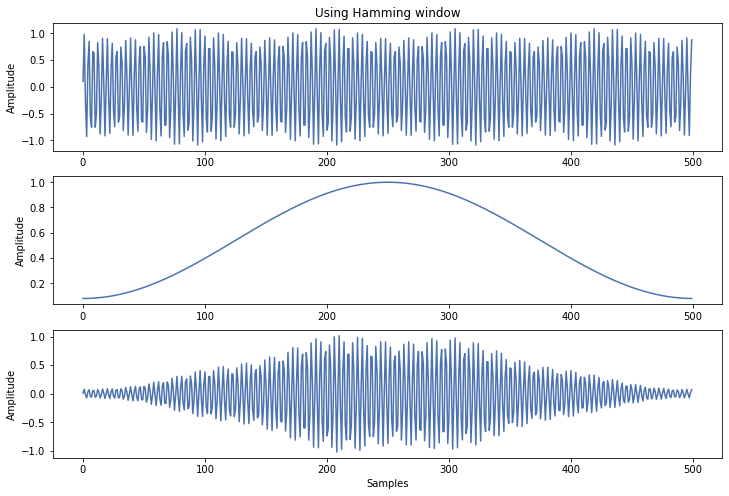

In [20]:
plt.figure(figsize = (12,8))
plt.subplot(3,1,1)
plt.plot(file)
plt.title("Using Hamming window")
plt.ylabel('Amplitude')
plt.subplot(3,1,2)
plt.plot(ham)
plt.ylabel('Amplitude')
plt.subplot(3,1,3)
plt.plot(window)
plt.ylabel('Amplitude')
plt.xlabel('Samples')

plt.savefig("Experiment-4/Results/hamming_Q4")

In [21]:
dft = np.abs(np.fft.fft(window))/500
N = np.arange(0,500)

The peaks are at the indices: [132 136 364 368]


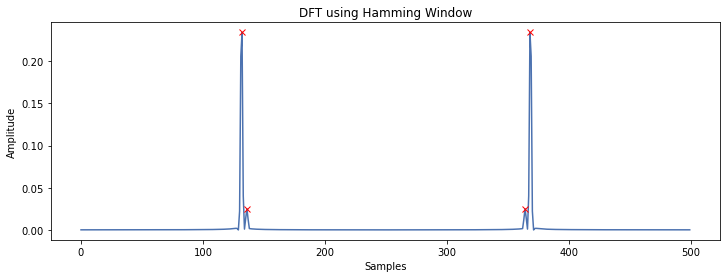

In [22]:
plt.figure(figsize = (12,4))
peak, _= sp.find_peaks(dft,threshold = 0.001)
plt.plot(N,dft)
plt.plot(N[peak],dft[peak],'rx')
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.title("DFT using Hamming Window")
plt.savefig("Experiment-4/Results/Dual_tone")
print("The peaks are at the indices:",peak)

Hence, first frequency component, $F_1 = \frac{132}{500}\cdot Fs$ , which gives $F_1 = 0.264 \cdot Fs$

The second frequency component, $F_2 = \frac{136}{500}\cdot Fs$ , which gives $F_2 = 0.272 \cdot Fs$

The peaks are at the indices: [132 136 364 368]


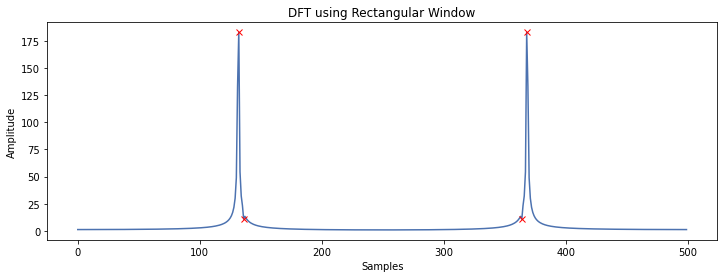

In [23]:
dft_box = np.abs(np.fft.fft(file))

plt.figure(figsize = (12,4))
peak, _= sp.find_peaks(dft,threshold = 0.01)
plt.plot(N,dft_box)
plt.plot(N[peak],dft_box[peak],'rx')
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.title("DFT using Rectangular Window")
plt.savefig("Experiment-4/Results/Dual_tone_box")
print("The peaks are at the indices:",peak)